In [16]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit, fmin

plt.rcParams.update({'font.size': 22})

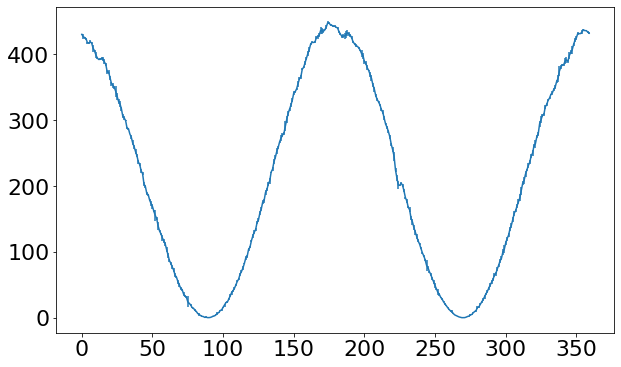

In [17]:
paths = ["../data/E_1_intensity_1700_run1.csv",
         "../data/E_1_intensity_1700_run2.csv",
         "../data/E_1_intensity_1700_run3.csv",
         "../data/E_1_intensity_1700_run4.csv",
         "../data/E_1_intensity_1700_run5.csv",
         "../data/E_1_intensity_2500_run1.csv",
         "../data/E_1_intensity_2500_run2.csv",
         "../data/E_1_intensity_2500_run3.csv",
         "../data/E_1_intensity_2500_run4.csv",
         "../data/E_1_intensity_2500_run5.csv",
        ]

data = np.zeros((len(paths), 360))
for i, path in enumerate(paths):
    data[i] = np.genfromtxt(path)

mean = np.mean(data, axis=0)
err = np.std(data, axis=0)
deg = np.linspace(0, 359, 360)

f = plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, yerr= err)

plt.show()

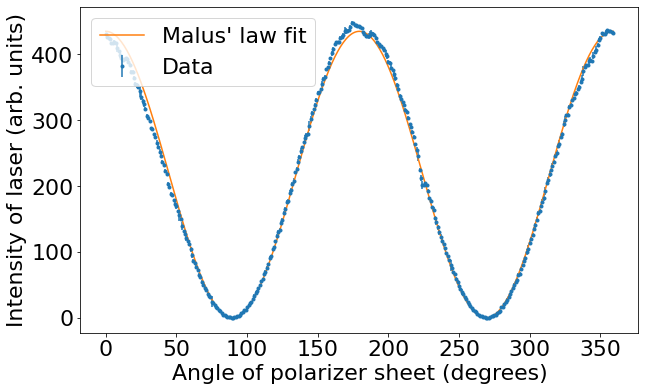

In [18]:
def cos_squared(x, A, k):
    return A*(np.cos(k*x*(2*np.pi)/360))**2

popt, pcov = curve_fit(cos_squared, xdata=deg, ydata=mean, sigma=err, p0=[800, 1])

f = plt.figure(figsize=(10,6))
plt.errorbar(deg, mean, yerr= err, fmt=".", label="Data")
plt.plot(deg, cos_squared(deg, popt[0], popt[1]), label="Malus' law fit")
plt.ylabel("Intensity of laser (arb. units)")
plt.xlabel("Angle of polarizer sheet (degrees)")
plt.legend()

plt.show()

## Checking the goodness of the fit with chi squared

https://www.jmp.com/en_sg/statistics-knowledge-portal/chi-square-test/chi-square-goodness-of-fit-test.html

In [27]:
from scipy.stats import chisquare

chisquare(mean, cos_squared(deg, popt[0], popt[1]))

Power_divergenceResult(statistic=176.72013511683437, pvalue=1.0)

In [30]:
def chi2(observed, expected):
    return np.sum((observed - expected)**2/expected)

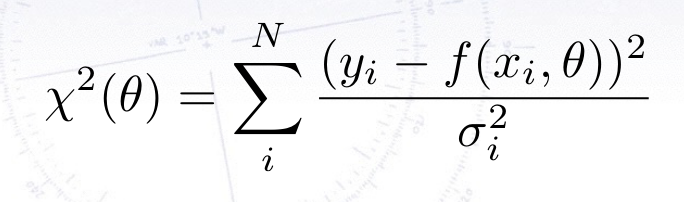

In [35]:
def chi2(observed, expected, err):
    return np.sum((observed - expected)**2/err**2)

chi2(mean, cos_squared(deg, popt[0], popt[1]), err)

7791.641088302242

In [36]:
from scipy.stats import chi2

chi2(df=359)

x = np.linspace(chi2.ppf(0.01, df),
                chi2.ppf(0.99, df), 100)

# Finding polarization

In [23]:
def cos_squared_minus(x, A, k):
    return -A*(np.cos(k*x*(2*np.pi)/360))**2

fmin(cos_squared_minus, 180, args=(popt[0], popt[1]))

Optimization terminated successfully.
         Current function value: -434.536498
         Iterations: 18
         Function evaluations: 36


array([179.41312408])